In [2]:
import sys; sys.path.append("../../population_mcmc")
from models import *
from mcmc_utils import *
import seaborn as sns
import pandas as pd
from scipy.stats import multivariate_normal
%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
Hbdomain =  np.zeros(100)
Hbdomain[30:70] =  1
Knidomain = np.zeros(100)
Knidomain[40:90] = 1
Krdomain = np.zeros(100)
Krdomain[20:80] = 1
Gtdomain = np.zeros(100)
Gtdomain[10:90] = 1
domains = np.concatenate([Hbdomain,Knidomain,Krdomain,Gtdomain])

In [4]:
m = PapaModelC8()

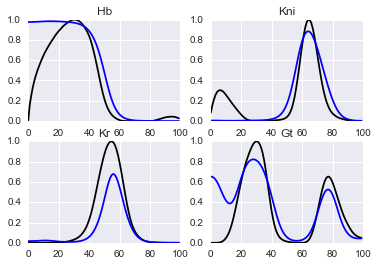

In [5]:
parms = [0.124, 0.889, 0.046579, 170.0, 5.621, 5.800, 6.182, 6.929]
plot_expression(m.y, m.predict, parms)

In [6]:
parms = [0.131, 0.86, 0.0014, 128.0, 5.76, 5.94, 6.35, 7.05]
calculate_log_likelihood(m.y, 0.01, domains, parms, m.predict)

-22955.640891390067

In [7]:
parms = [0.120864783272,0.762266582433,0.0548783921271,51.0,6.13431598503,6.25746214563,6.71608414442,7.54912545292]
calculate_log_likelihood(m.y, 0.01, domains, parms, m.predict)

-23030.466517917877

In [8]:
parms = [0.123931661897, 0.889332851013, 0.0465794394451, 159.0, 5.62132157887, 5.80044389978, 6.18204752944, 6.92892907155]
calculate_log_likelihood(m.y, 0.01, domains, parms, m.predict)

-23024.375900359184

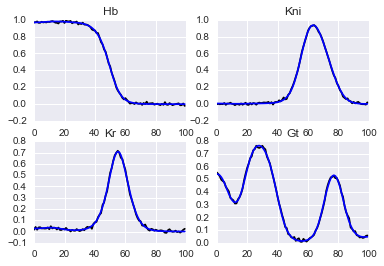

In [9]:
parms = [0.131, 0.86, 0.0014, 128.0, 5.76, 5.94, 6.35, 7.05]
pp = np.reshape(m.predict(parms), [100,4], order="F")
d  = {"Bcd": m.B, "Tll": m.T, "Hb_out": pp[:,0], "Hb_in": m.f0[:100], "Kr": pp[:,2], "kni": pp[:,1], "Gt": pp[:,3]}
df = pd.DataFrame(data = d)
cols_order = ["Bcd", "Hb_in", "Tll", "Hb_out", "Gt", "Kr", "kni"]
out_cols = ["Hb_out", "Gt", "Kr", "kni"]
for col in out_cols:
    df[col] =  multivariate_normal.rvs(df[col], 0.01*0.01, 1)
y = np.concatenate([df["Hb_out"], df["kni"], df["Kr"], df["Gt"]])
plot_expression(y, m.predict, parms)
df[cols_order].to_csv("inputs_outputs_sim.txt", sep = "\t", index = False, header = False)

In [25]:
parms = [0.131, 0.86, 0.0014, 128.0, 5.76, 5.94, 6.35, 7.05]
calculate_log_likelihood(y, 0.01, domains, parms, m.predict)

730.47829057761521

In [24]:
parms = [0.123931661897, 0.889332851013, 0.0465794394451, 159.0, 5.62132157887, 5.80044389978, 6.18204752944, 6.92892907155]
calculate_log_likelihood(y, 0.01, domains, parms, m.predict)

431.81013639638155

In [27]:
parms = [0.13005290889, 0.903870365303, 0.0443606490079, 161.0, 5.62930472296, 5.80500486402, 6.22536939619, 6.95002804581]
calculate_log_likelihood(y, 0.01, domains, parms, m.predict)

659.71845058161284